In [1]:
import pandas as pd
pd.pandas.set_option('display.max_columns',None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

In [2]:
df_test= pd.read_csv("Property_Price_Test.csv")
#df_test.head()

In [3]:
# checking the null values in train data
missing_train = df_test.isnull().sum()/len(df_test)*100
missing_train = missing_train[missing_train>0]
missing_train.sort_values(inplace = True, ascending=False)
missing_train.head(10)

Pool_Quality             99.794380
Miscellaneous_Feature    96.504455
Lane_Type                92.666210
Fence_Quality            80.123372
Fireplace_Quality        50.034270
Lot_Extent               15.558602
Garage_Built_Year         5.346127
Garage_Condition          5.346127
Garage_Quality            5.346127
Garage_Finish_Year        5.346127
dtype: float64

In [4]:
df_test.shape

(1459, 80)

In [5]:
df_test.drop(['Pool_Quality','Miscellaneous_Feature','Lane_Type','Fence_Quality','Fireplace_Quality'], axis=1, inplace=True)

In [6]:
df_test.shape

(1459, 75)

In [7]:
# Numerical variable and catedorical variable in train dataset
numeric_data= df_test.select_dtypes(include=[np.number])

# Categoruial variable
categorical_data= df_test.select_dtypes(exclude=[np.number])

# out-put
print("There are {} numeical and {} cateogrical feature in dataset". format(numeric_data.shape[1],categorical_data.shape[1]))

There are 37 numeical and 38 cateogrical feature in dataset


In [8]:
df_test.drop(['Kitchen_Above_Grade','Building_Class','House_Condition','LowQualFinSF','Year_Sold','Miscellaneous_Value','Underground_Half_Bathroom',
'BsmtFinSF2','Open_Lobby_Area','Garage_Area','Enclosed_Lobby_Area','Three_Season_Lobby_Area','Month_Sold','Pool_Area'],axis=1, inplace=True)

In [9]:
df_test.shape

(1459, 61)

In [10]:
numeric_data.isnull().sum().sum()

330

In [11]:
# Numerical variable and catedorical variable in train dataset
numeric_data= df_test.select_dtypes(include=[np.number])

# Categoruial variable
categorical_data= df_test.select_dtypes(exclude=[np.number])

# out-put
print("There are {} numeical and {} cateogrical feature in dataset". format(numeric_data.shape[1],categorical_data.shape[1]))

There are 23 numeical and 38 cateogrical feature in dataset


In [12]:
numerical_with_nan=[feature for feature in numeric_data.columns if numeric_data[feature].isnull().sum()>0 and numeric_data[feature].dtypes!='O']


In [13]:
for i in numerical_with_nan:
    df_test[i]=df_test[i].fillna(df_test[i].mean())

In [14]:
# Numerical variable and catedorical variable in train dataset
numeric_data= df_test.select_dtypes(include=[np.number])

# Categoruial variable
categorical_data= df_test.select_dtypes(exclude=[np.number])

# out-put
print("There are {} numeical and {} cateogrical feature in dataset". format(numeric_data.shape[1],categorical_data.shape[1]))

There are 23 numeical and 38 cateogrical feature in dataset


In [15]:
numeric_data.isnull().sum().sum()

0

In [16]:
categorical_data.isnull().sum().sum()

555

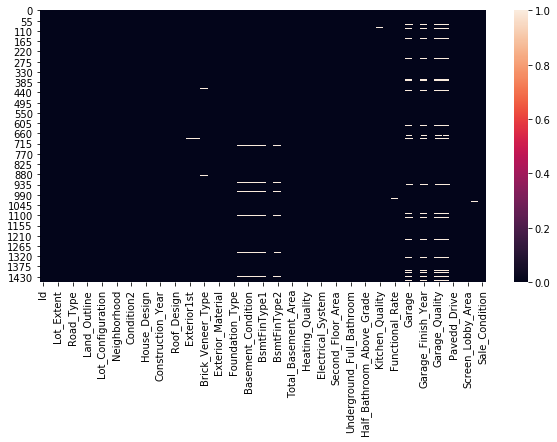

In [17]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_test.isnull())

In [18]:
for i in categorical_data:
    df_test[i]=df_test[i].fillna(df_test[i].mode()[0])

In [19]:
# Numerical variable and catedorical variable in train dataset
numeric_data= df_test.select_dtypes(include=[np.number])

# Categoruial variable
categorical_data= df_test.select_dtypes(exclude=[np.number])

# out-put
print("There are {} numeical and {} cateogrical feature in dataset". format(numeric_data.shape[1],categorical_data.shape[1]))

There are 23 numeical and 38 cateogrical feature in dataset


In [21]:
categorical_data.isnull().sum().sum()

0

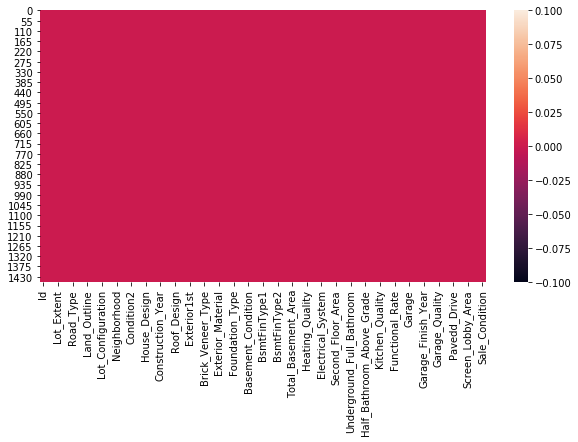

In [20]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_test.isnull())

In [23]:
df_test.shape

(1459, 61)

In [24]:
df_test.to_csv("df_test.csv", index=False)